In [82]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

## Data Exploaration

In [83]:
# Loading Training and Testing Data set
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [84]:
df.shape

(1460, 81)

In [85]:
df_test.shape

(1459, 80)

Here the test dataset has only 80 columns, while train dataset has 81 columnns. This is due to the fact that the test data do not include the final sale price information

In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [89]:
# Display the count of null values if exists in training set, in descending order

series = df.isnull().sum().sort_values(ascending=False)
for index, value in series.items() :
    if value > (df.shape[0] > 0) :
        print(str(index)+" : "+str(value))

PoolQC : 1453
MiscFeature : 1406
Alley : 1369
Fence : 1179
FireplaceQu : 690
LotFrontage : 259
GarageCond : 81
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
BsmtExposure : 38
BsmtFinType2 : 38
BsmtFinType1 : 37
BsmtCond : 37
BsmtQual : 37
MasVnrArea : 8
MasVnrType : 8


We have 5 features with high NaN values. 
- PoolQC 
- MiscFeature 
- Alley 
- Fence 
- FireplaceQu 

It is highly probable that these features won’t provide us with any useful insight on the dataset so we can consider removing them.

In [90]:
# Display the count of null values if exists in testing set, in descending order

series = df_test.isnull().sum().sort_values(ascending=False)
for index, value in series.items() :
    if value > (df_test.shape[0] > 0) :
        print(str(index)+" : "+str(value))

PoolQC : 1456
MiscFeature : 1408
Alley : 1352
Fence : 1169
FireplaceQu : 730
LotFrontage : 227
GarageCond : 78
GarageQual : 78
GarageYrBlt : 78
GarageFinish : 78
GarageType : 76
BsmtCond : 45
BsmtQual : 44
BsmtExposure : 44
BsmtFinType1 : 42
BsmtFinType2 : 42
MasVnrType : 16
MasVnrArea : 15
MSZoning : 4
BsmtHalfBath : 2
Utilities : 2
Functional : 2
BsmtFullBath : 2


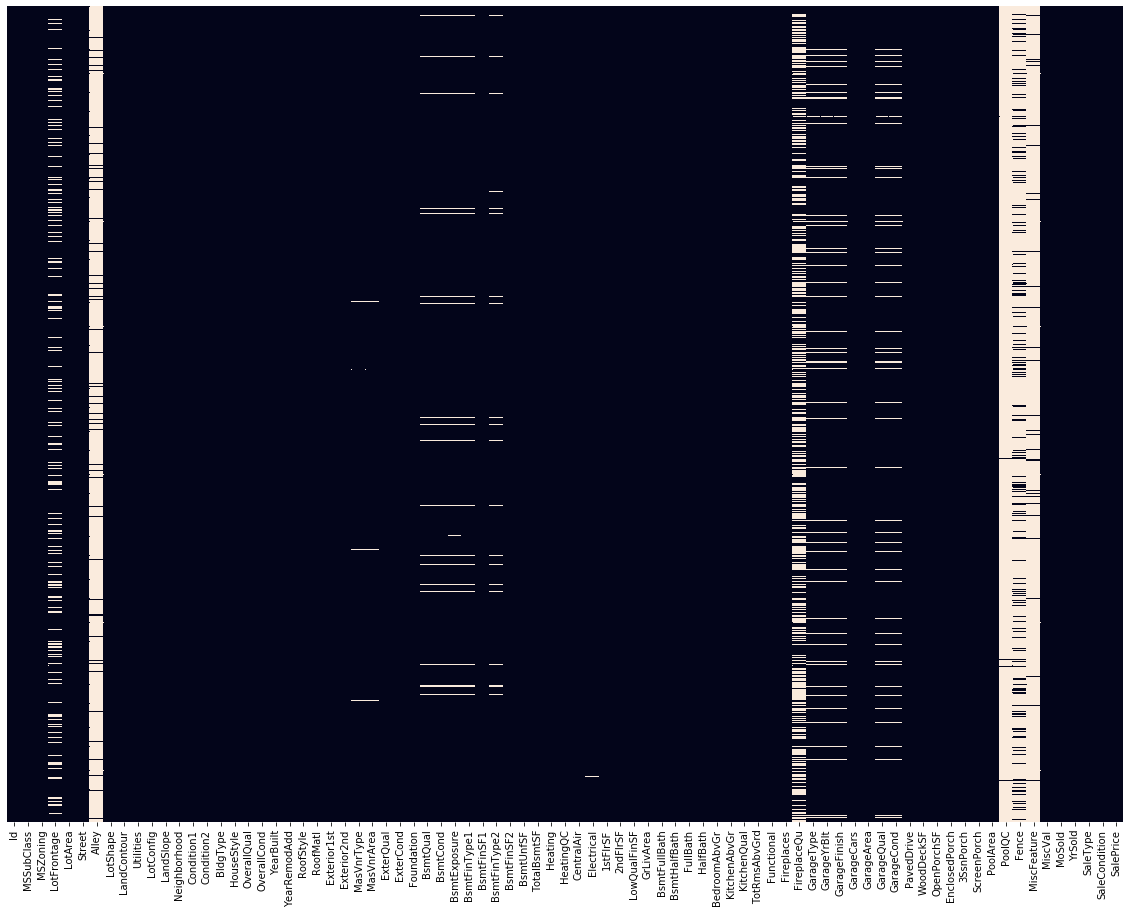

In [91]:
# Visual representation of Null values using the Heat map
plt.subplots(figsize=(20,15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [92]:
# Calculate the correlation between the features and the target
corr = df.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


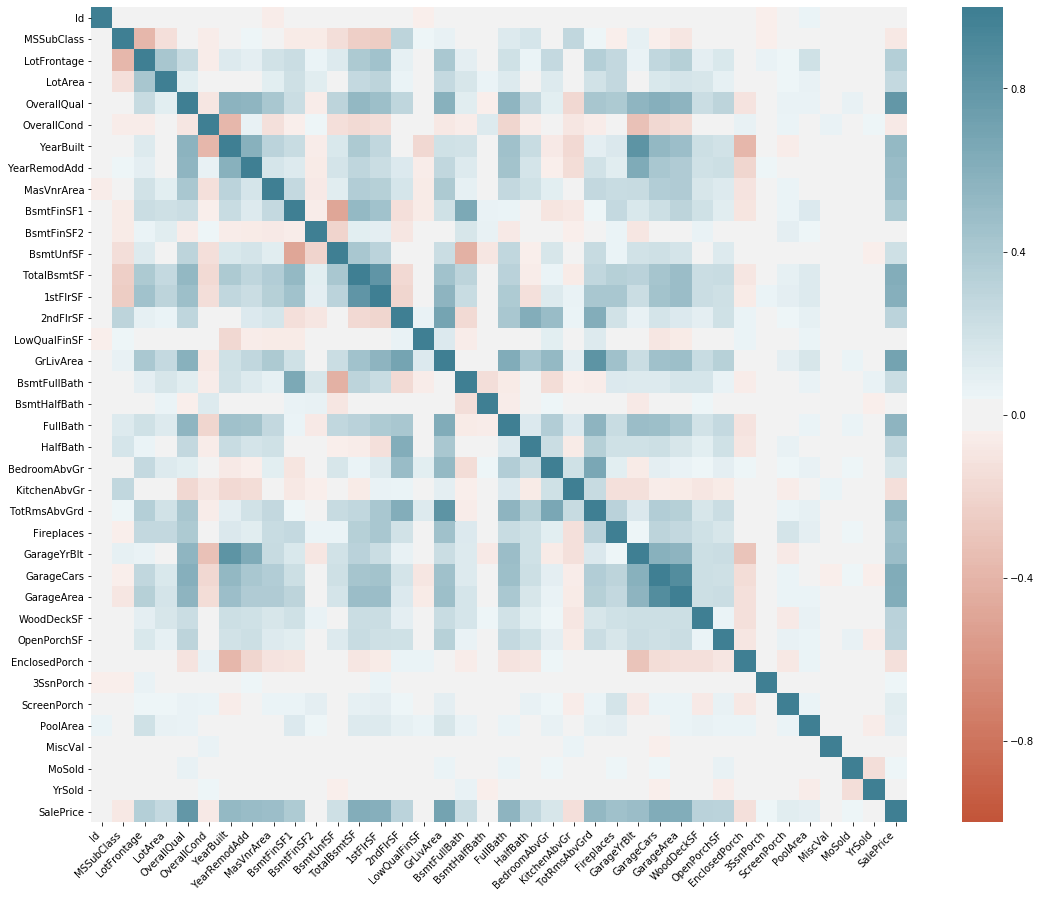

In [93]:
# Represent the correlation using Heat map
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

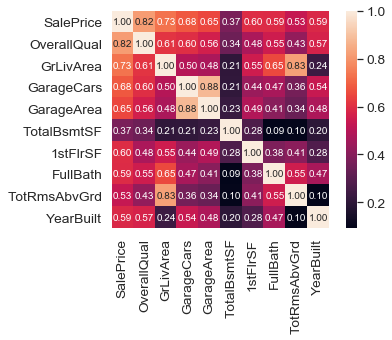

In [157]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [94]:
# Correlation with the price of the House
# Without Taking the ID
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

- First six features are the most positively correlated with the SalePrice (greater than 60%). We can not see good correlation between the rest of the features with the SalePrice

In [95]:
numerical=df.select_dtypes(exclude=[np.number])
numerical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## Data Representation

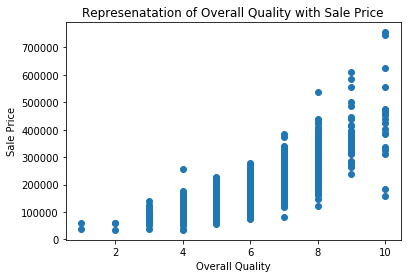

In [96]:
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Represenatation of Overall Quality with Sale Price')
plt.show()

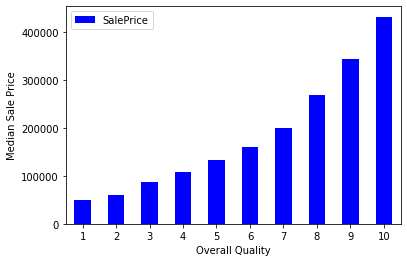

In [97]:
df.OverallQual.unique()
quality_pivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

- As the Overall Quality increases, the sale price also increases

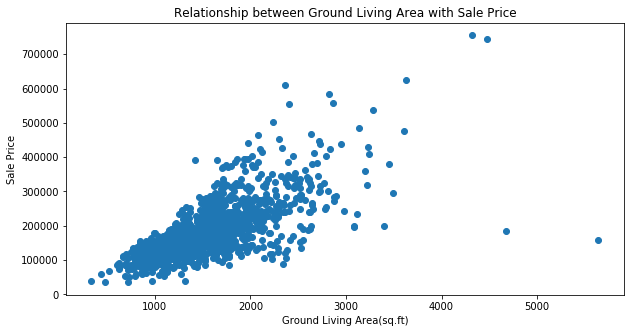

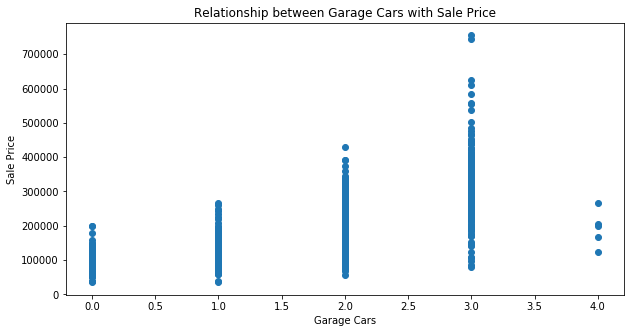

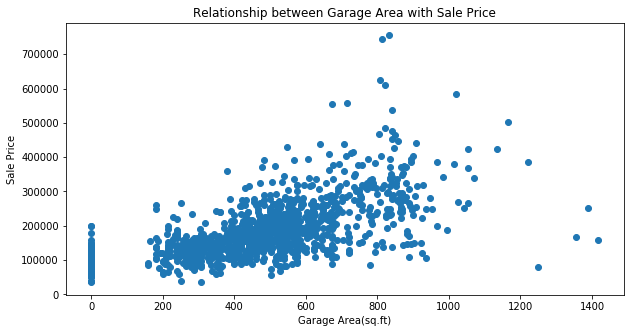

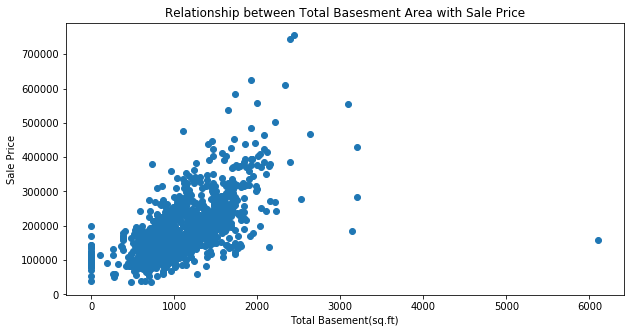

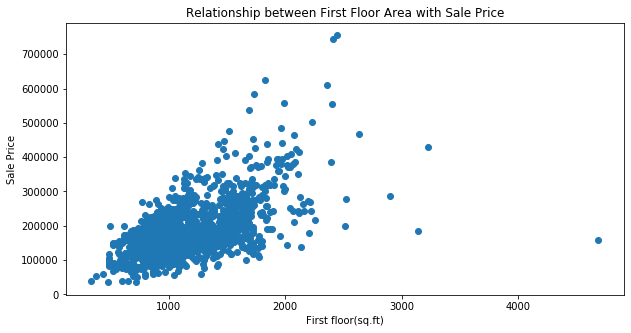

In [98]:
# Representation of Relationship between Ground Living Area with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Ground Living Area(sq.ft)')
plt.title('Relationship between Ground Living Area with Sale Price')
plt.show()

# Representation of Relationship between Garage Cars with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['GarageCars'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Cars')
plt.title('Relationship between Garage Cars with Sale Price')
plt.show()

# Representation of Relationship between Garage Area with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['GarageArea'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area(sq.ft)')
plt.title('Relationship between Garage Area with Sale Price')
plt.show()

# Represntation of Relationship between Total Basesment Area with Sale Price  
plt.figure(figsize=(10,5))
plt.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Total Basement(sq.ft)')
plt.title('Relationship between Total Basesment Area with Sale Price')
plt.show()
       
# Represntation of Relationship between First Floor Area with Sale Price
plt.figure(figsize=(10,5))
plt.scatter(x=df['1stFlrSF'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('First floor(sq.ft)')
plt.title('Relationship between First Floor Area with Sale Price')
plt.show()

- As the size of the Living Area increases corresponding Sale Price of the house also increases
- Garage Cars contains discrete values. By observing the chart, as the number of garage cars increases, the Sale Price of the house also increases
- There are many houses with no garage areas. As the size of the garagae area increases, corresponding sale price of the house also increases
- There are houses with no basements. As the Total area of the basement increases, Sale Price of the house also increases
- As the area of the first floor increases, the Sale price of the house also increases

G:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


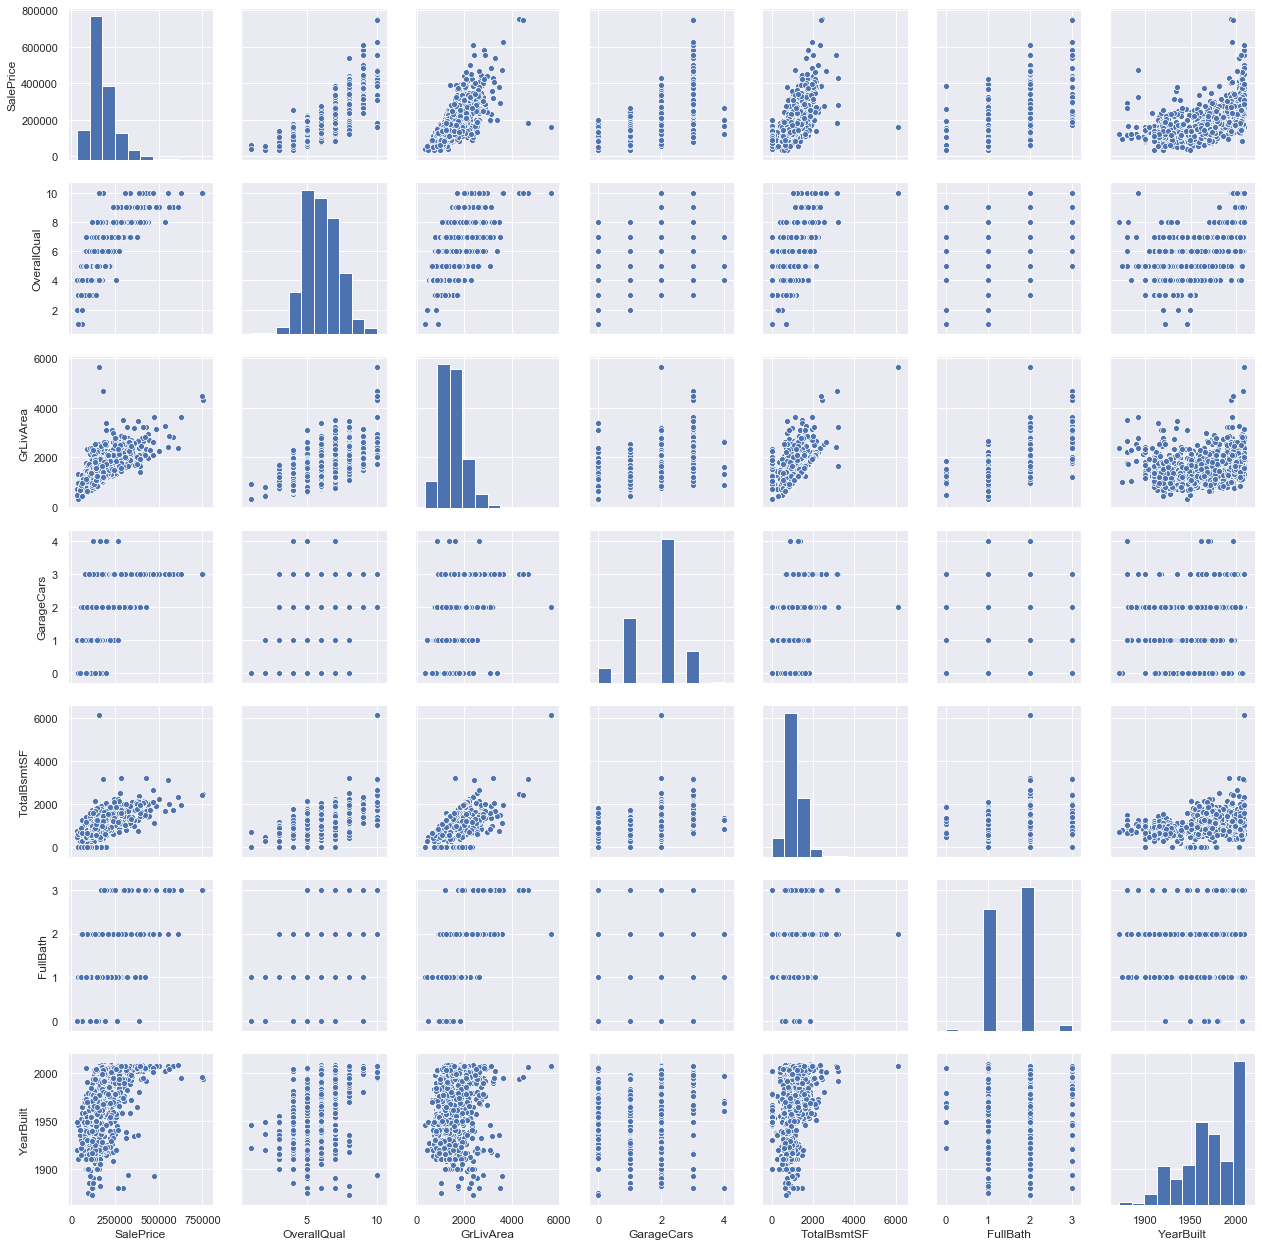

In [99]:
# Scatter plots between 'SalePrice' and correlated variables

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

## Feature Engineering

In [100]:
# Delete features with high number of missing values

df.drop(['PoolQC','Fence','MiscFeature','Alley', 'FireplaceQu'],axis=1,inplace=True)
df_test.drop(['PoolQC','Fence','MiscFeature','Alley', 'FireplaceQu'],axis=1,inplace=True)

# Drop the Id column
df.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1,inplace=True)

In [101]:
df.shape

(1460, 75)

In [102]:
df_test.shape

(1459, 74)

In [103]:
# Replacing Categorical Values using Mean

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mean())

df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

# Replacing Categorical Values using Mode

df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])

df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])

df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])

df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])

df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])

df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

- Since there are not millions of records but 1460 records we replaced all the null values present in numerical columns with the mean of that column and all the null values of present in categorical columns with the mode of that column

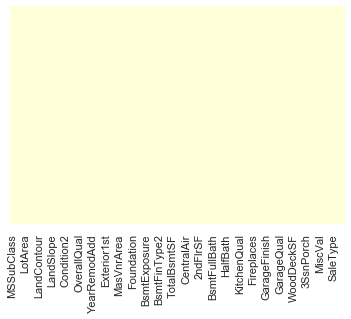

In [104]:
# Check if there are any more missing values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

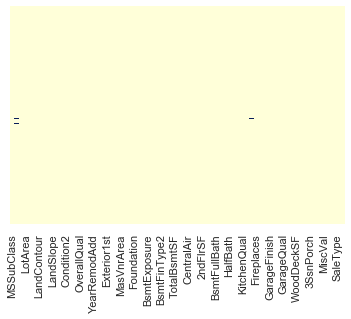

In [105]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [106]:
# if there are any other missing values drop them
df_test.dropna(inplace=True)

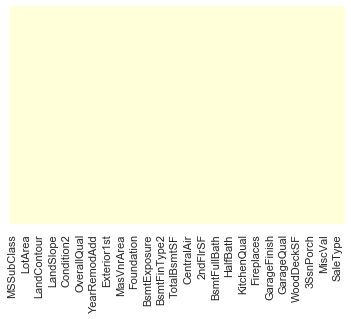

In [107]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

### Outliar analysis

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


- Low range values are similar and not too far from 0.
- High range values are far from 0 and the 7.something values are really out of range.
- So we'll not consider any of these values as an outlier.

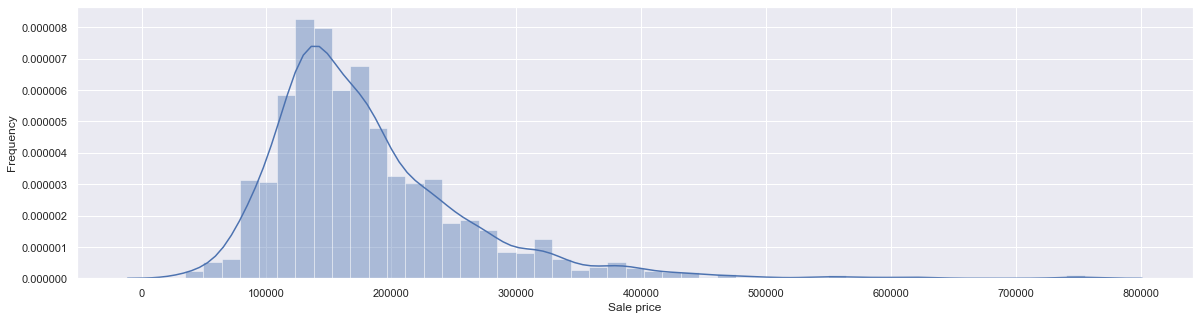

In [110]:
# Set up the matplotlib figure
plt.figure(figsize=(20,5))
sns.distplot(df['SalePrice'],kde=True)
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.show()

- Distribution is Positively Skewed. We will use Logrithmaic Transformation.

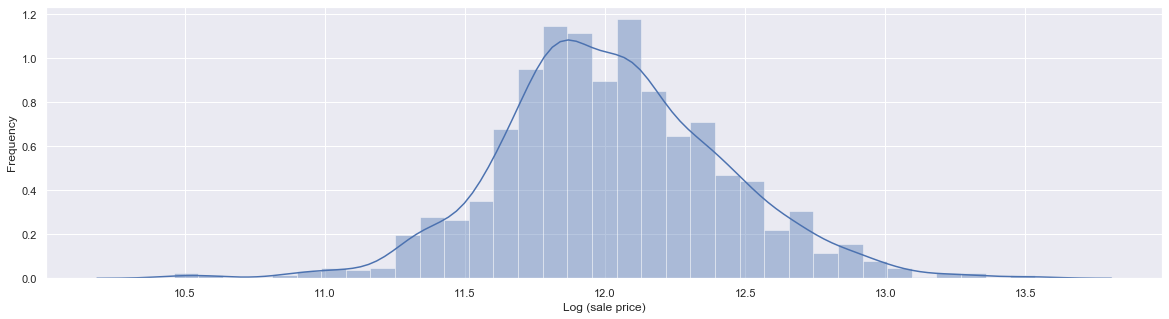

In [111]:
plt.figure(figsize=(20,5))
sns.distplot(np.log(df['SalePrice']),kde=True)
plt.xlabel('Log (sale price)')
plt.ylabel('Frequency')
plt.show()

- The distribution is nearly normal. Therefore, we'll consider the Log SalePrice here onwards.

In [112]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

In [113]:
from scipy.stats import norm

Skewness of GrLivArea :  1.3665603560164552


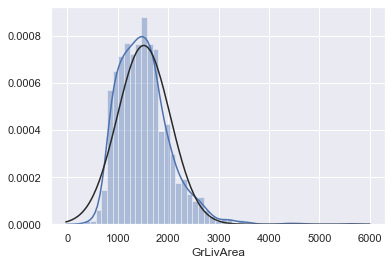

<Figure size 432x288 with 0 Axes>

In [114]:
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()

print('Skewness of GrLivArea : ',df['GrLivArea'].skew())

- This is also a little bit skewed so we will take the logrithamic format

In [115]:
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])

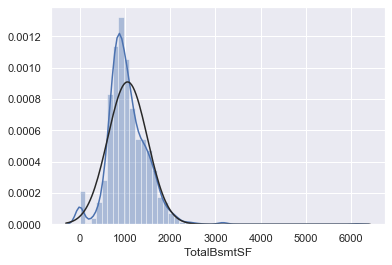

<Figure size 432x288 with 0 Axes>

In [116]:
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()

- Since this can not be converted to logrithmic as considerable 0 values. But we can not omit that because there can be houses without basement so we will transform the rest

In [117]:
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [118]:
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [119]:
df.shape

(1460, 76)

In [120]:
df_test.shape

(1447, 74)

In [121]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,12.317167,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,11.849398,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,12.429216,1


In [122]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [123]:
# Combine with test dat

final_df=pd.concat([df,df_test],axis=0)

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
final_df['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1428          NaN
1429          NaN
1430          NaN
1431          NaN
1432          NaN
1433          NaN
1434          NaN
1435          NaN
1436          NaN
1437          NaN
1438          NaN
1439          NaN
1440          NaN
1441          NaN
1442          NaN
1443          NaN
1445          NaN
1446          NaN
1447          NaN
1448          NaN
1449          NaN
1450          NaN
1451          NaN
1452          NaN
1453      

In [125]:
final_df.shape

(2907, 76)

In [126]:
# Handle Categorical features

In [127]:
categorical_features = [column for column in df.columns if df[column].dtype == object]
print('Number of Categorical columns',len(categorical_features))
print(categorical_features)

Number of Categorical columns 38
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [129]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final


In [130]:
final_df=category_onehot_multcols(categorical_features)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [131]:
final_df.shape

(2907, 234)

In [132]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [133]:
final_df.shape

(2907, 178)

In [134]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [135]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [136]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,1,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,1,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,1,0,0,0,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,1,0,0,0,1,0


In [137]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,1,0,0,0,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,1,0,0,0,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,1,0,0,0,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,1,0,0,0,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,1,0,0,0,1,0


In [138]:
df_Train.shape

(1460, 178)

In [139]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

G:\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [140]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Model Creation and Evaluation

In [141]:
# Multiple Linear Regression Model with Ordinary Least Square Method

x = sm.add_constant(X_train)
results2 = sm.OLS(y_train,x).fit()
results2.summary()

G:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 01 Jan 2020   Prob (F-statistic):               0.00
Time:                        00:26:24   Log-Likelihood:                 1284.5
No. Observations:                1460   AIC:                            -2213.
Df Residuals:                    1282   BIC:                            -1272.
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0621      4.739      0.857      0.392      -5.235      13.359
1stFlrSF      -4.194e-05   4.25e-05     -0.987      0.324      -0.000    4.15e-05
2ndFlrSF       3.762e-05   3.26e-05      1.154      0.249   -2.63e-05       0.000
3SsnPorch         0.0002      0.000      1.706      0.088   -2.67e-05       0.000
BedroomAbvGr     -0.0096      0.006     -1.532      0.126      -0.022       0.003
BsmtFinSF1     3.993e-05   4.02e-05      0.993      0.321    -3.9e-05       0.000
BsmtFinSF2     4.126e-06   4.38e-05      0.094      0.925   -8.18e-05       9e-05
BsmtFullBath      0.0253      0.009      2.792      0.005       0.008       0.043
BsmtHalfBath      0.0043      0.014      0.313      0.754      -0.023       0.031
BsmtUnfSF     -1.946e-05   4.08e-05     -0.477      0.633   -9.95e-05    6.05e-05
EnclosedPorch     0.0001   5.64e-05      1.872      0.061   -5.08e-06       0.000
Fireplaces        0.0254      0.006      4.136      0.000       0.013       0.037
FullBath          0.0159      0.010      1.587      0.113      -0.004       0.035
GarageArea     9.259e-05    3.5e-05      2.645      0.008    2.39e-05       0.000
GarageCars        0.0290      0.010      2.917      0.004       0.010       0.049
GarageYrBlt       0.0001      0.000      0.507      0.612      -0.000       0.001
GrLivArea         0.4544      0.053      8.599      0.000       0.351       0.558
HalfBath          0.0174      0.010      1.828      0.068      -0.001       0.036
HasBsmt          -0.6427      0.206     -3.125      0.002      -1.046      -0.239
KitchenAbvGr     -0.0699      0.025     -2.774      0.006      -0.119      -0.020
LotArea        2.142e-06   4.76e-07      4.498      0.000    1.21e-06    3.08e-06
LotFrontage       0.0004      0.000      2.261      0.024     5.9e-05       0.001
LowQualFinSF  -8.658e-06   8.59e-05     -0.101      0.920      -0.000       0.000
MSSubClass       -0.0004      0.000     -0.983      0.326      -0.001       0.000
MasVnrArea    -3.417e-08   2.65e-05     -0.001      0.999   -5.21e-05     5.2e-05
MiscVal       -6.066e-06    6.3e-06     -0.962      0.336   -1.84e-05     6.3e-06
MoSold           -0.0018      0.001     -1.609      0.108      -0.004       0.000
OpenPorchSF    5.653e-05    5.2e-05      1.086      0.278   -4.56e-05       0.000
OverallCond       0.0429      0.004     11.312      0.000       0.035       0.050
OverallQual       0.0426      0.005      9.349      0.000       0.034       0.052
PoolArea          0.0002    8.2e-05      2.506      0.012    4.46e-05       0.000
ScreenPorch       0.0003   5.58e-05      4.548      0.000       0.000       0.000
TotRmsAbvGrd      0.0083      0.004      1.935      0.053      -0.000       0.017
TotalBsmtSF       0.1060      0.035      3.063      0.002       0.038       0.174
WoodDeckSF        0.0001   2.67e-05      3.815   

In [142]:
# With Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [143]:
print("lr.coef_:", lr.coef_)#slope parameter
print("lr.intercept_:", lr.intercept_)#intercept parameter

lr.coef_: [-4.19363956e-05  3.76244318e-05  1.77763349e-04 -9.63596554e-03
  3.99272105e-05  4.12577016e-06  2.53232592e-02  4.29273016e-03
 -1.94601637e-05  1.05642194e-04  2.54341898e-02  1.58689113e-02
  9.25886308e-05  2.90289420e-02  1.23632560e-04  4.54385194e-01
  1.74246344e-02 -6.42709041e-01 -6.98956395e-02  2.14194391e-06
  4.45512754e-04 -8.65848286e-06 -3.74678770e-04 -3.41729149e-08
 -6.06551846e-06 -1.81432262e-03  5.65289467e-05  4.29238347e-02
  4.26101990e-02  2.05474512e-04  2.53683412e-04  8.27709818e-03
  1.05973770e-01  1.01681354e-04  1.81856759e-03  7.84244985e-04
 -2.06760934e-03  4.02661527e-01  3.81327807e-01  3.88786973e-01
  3.49070070e-01  9.13995362e-02  3.72417165e-02  2.92513979e-02
  8.01963032e-03  5.06639009e-02 -7.37612998e-04  3.93109797e-02
 -2.24432441e-01  3.56707958e-02 -3.00002959e-02 -8.70544521e-02
 -1.09494886e-02  4.35468545e-02 -1.17655401e-01 -2.24730824e-02
  1.29534700e-02  5.06770936e-02  4.46784379e-02  1.39721303e-02
  1.25328882e-0

In [144]:
#training set performance
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
#test set performance
# print("Test set score: {:.2f}".format(lr.score(X_Test, y_test)))

Training set score: 0.94


In [145]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

regressor=XGBRegressor()

In [146]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [147]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [148]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [149]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.3min finished
G:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
G:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [150]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [152]:
### Training With Regressor
regressor=XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [153]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)